<a href="https://colab.research.google.com/github/py222015328/CEE2/blob/main/Trabalho1_Brenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da taxa SELIC em um determinado período

## Introdução

A Taxa SELIC (Sistema Especial de Liquidação e Custódia) é a taxa básica de juros da economia brasileira, utilizada como principal
instrumento de política monetária pelo Banco Central do Brasil. Ela influencia diretamente outras taxas de juros no mercado, como
as cobradas em empréstimos, financiamentos e aplicações financeiras. Em termos práticos, quando o Banco Central aumenta a
SELIC, o objetivo é conter a inflação; quando reduz, busca estimular a economia por meio do aumento do consumo e do
investimento.

Monitorar a evolução da SELIC é fundamental para entender o comportamento da economia ao longo do tempo. Neste trabalho,
foi utilizado a linguagem Python para acessar dados reais da Taxa SELIC disponibilizados pelo Banco Central, realizar análises e
gerar visualizações que ajudam a interpretar o impacto dessa taxa sobre investimentos e decisões econômicas.

## Metodologia

Ao acessar a url da API do Banco Central em formato json, fazer a requisição e baixar a série temporal diária da Taxa SELIC de **14/06/2021 a 18/06/2021**, obtemos os valores da taxa selic em porcentagem desses dias ($T_{diária}$).

Para converter essa taxa diária para anual foi utilizado a seguinte equação:

$$T_{anual}=(1+T_{diária})^{252} -1,$$

em que:
- $T_{diária}$ é a taxa diária expressa em valor decimal.
- 252 representa a quantidade aproximada de dias úteis em um ano.

Para calcular a taxa selic acumulada durante esses dias, foi utilizado a formula:

$$T_{acumulada} = \prod (1+T_{diária}) -1 ,$$

em que o produtório é calculado ao longo de todos os dias do período analisado.

## Resultados

Abaixo segue a tabela dos valores da taxa selic diária, anual e acumulada para cada dia do período analisado:

In [146]:
import requests
import pandas as pd


data_inicial="14/06/2021"
data_final="18/06/2021"


url =f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}"

#Fazer a requisição
response = requests.get(url)

if response.status_code == 200:
    dados = response.json()
    df = pd.DataFrame(data=dados)
    df['data'] = pd.to_datetime(df['data'],format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
    df['valor'] = df['valor'].astype(float)
else:
    print("Erro ao acessar a API do Banco Central")


df['taxa anual'] = (1 + (df['valor']/100))**252 - 1
df['valor original'] = 1 + df['valor']/100
df['taxa acumulada'] = df['valor original'].cumprod() - 1
df['acumulado'] = df['taxa acumulada'] *100

df1 = df[['data','valor','taxa anual', 'acumulado']].copy()
df1.rename(columns = {'data': 'Datas', 'valor': 'SELIC Diária(%)','taxa anual': 'SELIC Anual(%)', 'acumulado': 'SELIC Acumulada(%)'},inplace=True)
#display(df1)
#print(df1.to_markdown(index=False))

<div align="center">

| Datas      |   SELIC Diária(%) |   SELIC Anual(%) |   SELIC Acumulada(%) |
|:-----------|------------------:|-----------------:|---------------------:|
| 14/06/2021 |          0.013269 |        0.0340009 |            0.013269  |
| 15/06/2021 |          0.013269 |        0.0340009 |            0.0265398 |
| 16/06/2021 |          0.013269 |        0.0340009 |            0.0398123 |
| 17/06/2021 |          0.016137 |        0.0415    |            0.0559557 |
| 18/06/2021 |          0.016137 |        0.0415    |            0.0721017 |
</div>

Também é possível analisar esses valores graficamente:

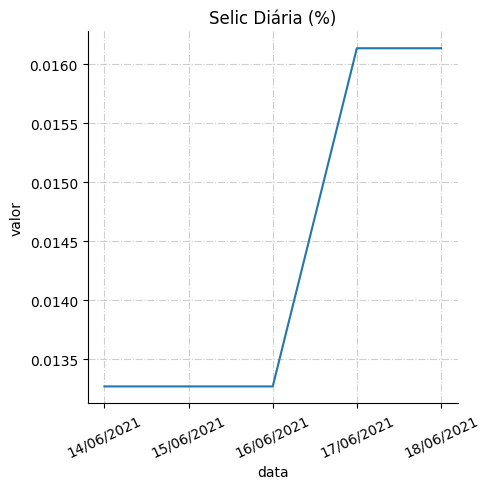

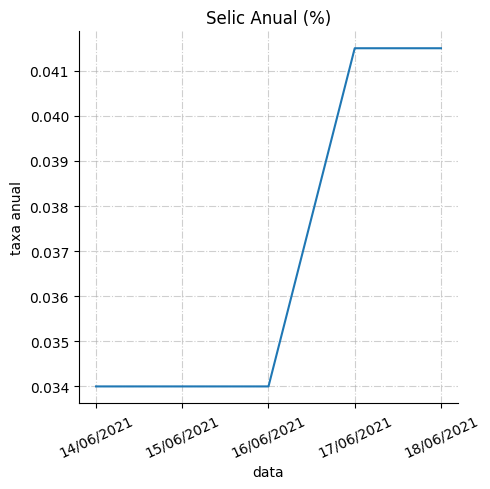

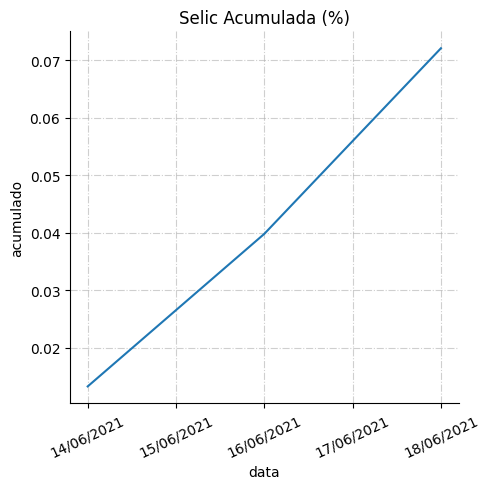

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#Criação grafico 1

sns.relplot(data=df, x ='data', y= "valor", kind='line')
plt.title('Selic Diária (%)')
plt.grid(True, linestyle='-.', alpha=0.6)
plt.xticks(rotation=25)  # Rotaciona os rótulos para evitar sobreposição
plt.tight_layout()
plt.show()

#Criação grafico 2

sns.relplot(data=df, x ='data', y= "taxa anual", kind='line')
plt.title('Selic Anual (%)')
plt.grid(True, linestyle='-.', alpha=0.6)
plt.xticks(rotation=25)  # Rotaciona os rótulos para evitar sobreposição
plt.tight_layout()
plt.show()

#Criação grafico 3

sns.relplot(data=df, x ='data', y= "acumulado", kind='line')
plt.title('Selic Acumulada (%)')
plt.grid(True, linestyle='-.', alpha=0.6)
plt.xticks(rotation=25)  # Rotaciona os rótulos para evitar sobreposição
plt.tight_layout()
plt.show()

É possível observar que a taxa selic diária se manteve 1,33% nos 3 primeiros dias da semana (14/06/25 a 16/06/25) e aumentou para 1,61% nos 2 últimos dias. Aumento que também é refletido na taxa de juros anual que subiu de 3,4% nos três primeiros dias para 4,15% nos dois últimos dias.

## Comentários

De acordo com a tabela e os gráficos, podemos observar que:

In [99]:
# Maior taxa anual

valor_maximo = df1['SELIC Anual(%)'].max()
periodos_maximos = df1[df1['SELIC Anual(%)'] == valor_maximo]
data_inicio = periodos_maximos['Datas'].iloc[0]
data_fim= periodos_maximos['Datas'].iloc[-1]
print(f'Dentro do período analisado, as datas em que foi observado maior taxa de juros anual foi entre {data_inicio} e {data_fim} no qual a taxa foi de {valor_maximo *100 :.2f}%.')

Dentro do período analisado, as datas em que foi observado menor taxa de juros anual foi entre 17/06/2021 e 18/06/2021 no qual a taxa foi de 4.15%.


In [100]:
# Menor taxa anual
valor_minimo = df1['SELIC Anual(%)'].min()
periodos_minimos = df1[df1['SELIC Anual(%)'] == valor_minimo]
data_inicio = periodos_minimos['Datas'].iloc[0]
data_fim= periodos_minimos['Datas'].iloc[-1]
print(f'Dentro do período analisado, as datas em que foi observado menor taxa de juros anual foi entre {data_inicio} e {data_fim} no qual a taxa foi de {valor_minimo *100 :.2f}%.')

Dentro do período analisado, as datas em que foi observado menor taxa de juros anual foi entre 14/06/2021 e 16/06/2021 no qual a taxa foi de 3.40%.


## Simulações

Realizando uma simulação de um investimento de R$ 5.000,00 com um único aporte, aplicado a 100% da taxa Selic diária, obtemos os seguintes valores em reais:

In [147]:
investimento = 5000
valores =[investimento]
for i in df['valor']:
  reais = valores[-1] * (1+i/100)
  valores.append(round(reais,3))

valores = valores[1:]
df2 = pd.DataFrame(valores, columns = ['Valor(R$)'])

df_novo = pd.concat([df1['Datas'],df1['SELIC Diária(%)'],df2],axis=1)
#display(df_novo)
#print(df_novo.to_markdown(index=False))

<div align="center">

| Datas      |   SELIC Diária(%) |   Valor(R$) |
|:-----------|------------------:|------------:|
| 14/06/2021 |          0.013269 |     5000.66 |
| 15/06/2021 |          0.013269 |     5001.33 |
| 16/06/2021 |          0.013269 |     5001.99 |
| 17/06/2021 |          0.016137 |     5002.8  |
| 18/06/2021 |          0.016137 |     5003.6  |

</div>

Realizando uma simulação de um investimento recorrente de R$ 100,00 com aportes diários constantes (aplicados a 100% da taxa Selic diária em que o rendimento é calculado com base no regime de capitalização composta, ou seja, cada aporte rende de acordo com os dias úteis até o fim do período), obtemos os seguintes valores acumulados em reais:

In [148]:
aporte = 100
acumulado = []
valor_total = 0

for i in df1['SELIC Diária(%)']:
    valor_total += aporte
    valor_total *= (1 + i/100)
    acumulado.append(valor_total)

df3 = pd.DataFrame(acumulado, columns = ['Valor Acumulado(R$)'])
concatenado = pd.concat([df1['Datas'],df1['SELIC Diária(%)'],df3],axis=1)
#display(concatenado)
#print(concatenado.to_markdown(index=False,floatfmt=".4f"))

<div align="center">

| Datas      |   SELIC Diária(%) |   Valor Acumulado(R$) |
|:-----------|------------------:|----------------------:|
| 14/06/2021 |            0.0133 |              100.0133 |
| 15/06/2021 |            0.0133 |              200.0398 |
| 16/06/2021 |            0.0133 |              300.0796 |
| 17/06/2021 |            0.0161 |              400.1442 |
| 18/06/2021 |            0.0161 |              500.2249 |

</div>